In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [22]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [6]:
df['Product ID'].unique() #every product id is unique.

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      shape=(10000,), dtype=object)

In [ ]:
df['Machine failure'].value_counts()
#339 data points are failure and 9661 are not failure

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [25]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_demo = df.drop('UDI', axis=1)
df_demo.drop('Product ID', axis=1, inplace=True)
df_demo.drop('Type', axis=1, inplace=True)
corr=df_demo.corr()

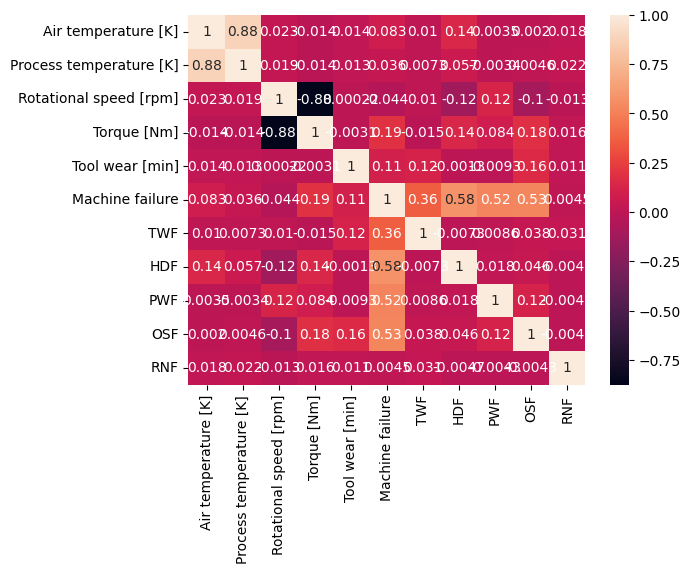

In [11]:
sns.heatmap(corr, annot=True)
plt.show()
#torque and rotational speed
#air temperature and process temperature

In [ ]:
df['TWF'] == 1

TWF
0    9954
1      46
Name: count, dtype: int64

In [26]:
df['Temp_difference'] = df['Process temperature [K]']-df['Air temperature [K]']
df['Machine Power [W]'] = np.round((df['Torque [Nm]']*df['Rotational speed [rpm]']* 2 * np.pi) / 60,4)

In [ ]:
df.drop(columns=['UDI','Product ID'], inplace=True)

KeyError: "['UDI', 'Product ID'] not found in axis"

In [30]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_difference,Machine Power [W]
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.1294
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5434.7040
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5753.6175
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.1026


In [31]:
df['Temp_difference'].value_counts()

Temp_difference
9.5     478
11.0    421
9.3     416
11.2    338
11.1    329
       ... 
11.8      9
7.6       7
12.1      2
12.1      2
7.6       1
Name: count, Length: 83, dtype: int64

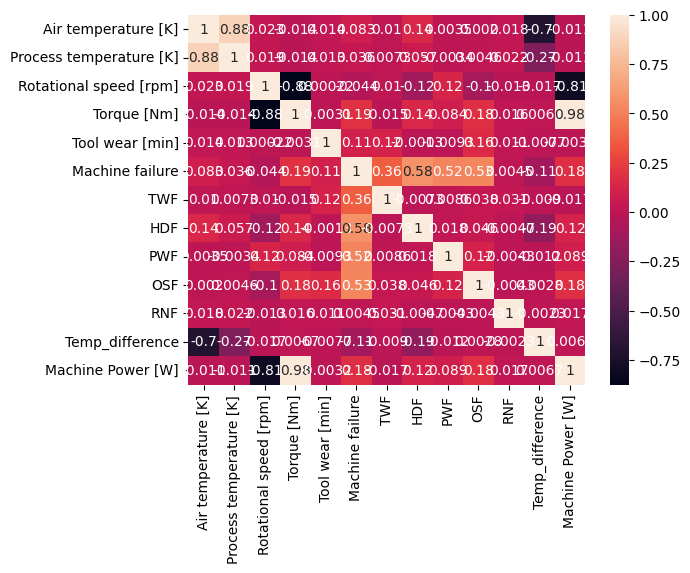

In [38]:
df['Machine Power [W]'].nunique()
df_demo = df
df_demo.drop('Type', axis=1, inplace=True)
corr = df_demo.corr()
sns.heatmap(corr, annot=True)
plt.show()